# Базовое решение задачи 1 отборочного этапа

Краткое описание задачи: Есть набор данных о месторождении и местодобычи нефти, необходимо определить тип месторождения.

Соревнование по задаче на kaggle:

https://www.kaggle.com/c/profitrain1/overview

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_final.csv to train_final.csv


In [ ]:
import pandas as pd

train = pd.read_csv("train_final.csv")
train.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,5.000000,0.100000
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,16.000000,10.000000
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,8.000000,0.500000
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,14.984042,29.920211
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,9.500000,10.000000


# Исследование данных

1. Какая размерность данных?
2. Что есть признаки? Что есть целевая переменная?
3. Какие типы данных представлены в наборе?
4. Есть ли пропуски в данных?
5. Сколько классов и какое у них соотношение?
6. Есть ли категориальные признаки?

In [ ]:
# размерность данных
train.shape

(355, 12)

In [ ]:
train['Onshore/Offshore'].value_counts() #целевая переменная

ONSHORE             177
OFFSHORE            173
ONSHORE-OFFSHORE      5
Name: Onshore/Offshore, dtype: int64

Посмотрев на целевую переменную, можем сделать следующие выводы:
- у нас три класса
- классы  несбалансировали

In [ ]:
train.isna().sum() # проверим есть ли пропуски в данных

Tectonic regime       0
Onshore/Offshore      0
Hydrocarbon type      0
Reservoir status      0
Structural setting    0
Depth                 0
Period                0
Lithology             0
Gross                 0
Netpay                0
Porosity              0
Permeability          0
dtype: int64

In [ ]:
train.head(2)

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.0,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.0,JURASSIC,SANDSTONE,980.0,490.0,16.0,10.0


In [ ]:
train.dtypes

Tectonic regime        object
Onshore/Offshore       object
Hydrocarbon type       object
Reservoir status       object
Structural setting     object
Depth                 float64
Period                 object
Lithology              object
Gross                 float64
Netpay                float64
Porosity              float64
Permeability          float64
dtype: object

**Категориальные признаки:**
- Tectonic regime
- Onshore/Offshore
- Hydrocarbon type
- Reservoir status
- Structural setting
- Period
- Lithology

Остальные признаки относятся к числовым.
Целевая переменная также является категориальной.

# Подготовка данных

**Обработаем категориальные признаки:**
Tectonic regime, Onshore/Offshore, Hydrocarbon type, Reservoir status, Structural setting, Period, Lithology - категориальные переменные!!

Есть разные методы как это можно сделать:
- LabelEncoder()
- Get_dummies()
- OneHotVector()



In [ ]:
train['Tectonic regime']
# в одной строчке несколько режимов, которые разделены /

0                                            COMPRESSION
1              COMPRESSION/EVAPORITE/EXTENSION/INVERSION
2                                    COMPRESSION/EROSION
3      COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION
4                                    COMPRESSION/EROSION
                             ...                        
350                                  COMPRESSION/EROSION
351                                  COMPRESSION/EROSION
352                 STRIKE-SLIP/TRANSPRESSION/BASEMENT-I
353                 STRIKE-SLIP/TRANSPRESSION/BASEMENT-I
354                      INVERSION/COMPRESSION/EXTENSION
Name: Tectonic regime, Length: 355, dtype: object

In [ ]:
train_full = train.copy() # создадим копию датафрейма

# воспользуемся методом get_dummies(), который очень умный и может работать с множнственными категориями
# (для этого мы указываем разделитель /)
train_full = train_full['Tectonic regime'].str.get_dummies('/')
train_full.head()

,BASEMENT-I,COMPRESSION,DIAPIR,EROSION,EVAPORITE,EXTENSION,GRAVITY,INVERSION,LINKED,REACTIVATION,SHALE,STRIKE-SLIP,SYNSEDIMENTATION,TRANSPRESSION,TRANSTENSION,UPLIFT
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# добавим к каждому названию префик regime_, что далее понимать откуда эти столбцы взялись
train_full = train_full.add_prefix('regime_').reset_index()

# удалим лишний столец и соединим полученное кодирование категориальной переменной
# со всем набором данных
train_full.drop(['index'], axis=1, inplace=True)
train_full = pd.concat([train, train_full], axis=1)
train_full.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_full['Hydrocarbon type'].unique()

array(['OIL', 'GAS-CONDENSATE', 'GAS', 'CARBON DIOXIDE',
       'METHANE HYDRATE'], dtype=object)

In [ ]:
train_full['Structural setting'].unique()

array(['FORELAND', 'RIFT/SALT', 'FORELAND/RIFT/SALT', 'THRUST', 'RIFT',
       'INVERSION/RIFT', 'PASSIVE', 'PASSIVE/RIFT', 'BACKARC/RIFT',
       'BACKARC/INVERSION/PASSIVE', 'INVERSION/RIFT/SALT',
       'INTRACRATONIC', 'BACKARC/INVERSION', 'FORELAND/SALT',
       'INVERSION/RIFT/SUB-SALT', 'PASSIVE/RIFT/SUB-SALT',
       'DELTA/PASSIVE/SALT', 'INVERSION/RIFT/THRUST/WRENCH',
       'BACKARC/DELTA/FORELAND', 'FORELAND/SUB-THRUST/THRUST',
       'RIFT/WRENCH', 'INVERSION/PASSIVE/RIFT/SALT',
       'DELTA/FORELAND/THRUST', 'FORELAND/THRUST', 'RIFT/SUB-SALT',
       'PASSIVE/SALT', 'DELTA/FORELAND', 'DELTA/PASSIVE/RIFT/SALT',
       'FORELAND/PASSIVE', 'BACKARC/INVERSION/WRENCH',
       'PASSIVE/RIFT/SALT', 'DELTA/INVERSION/WRENCH', 'PASSIVE/SUB-SALT',
       'SUB-THRUST', 'DELTA/PASSIVE/SUB-SALT', 'FORELAND/SUB-SALT',
       'DELTA/PASSIVE', 'BACKARC/DELTA/FORELAND/INVERSION',
       'INVERSION/SUB-SALT', 'FOREARC/INVERSION/RIFT',
       'BACKARC/INVERSION/RIFT', 'INTRACRATONIC/SUB-SAL

In [ ]:
# анологично сделаем для множественного категориального признака - Structural setting
# с помощью дополнительного датафрейма
tmp = train_full.copy()
tmp = tmp['Structural setting'].str.get_dummies('/')

tmp = tmp.add_prefix('Structural setting_').reset_index()
tmp.drop(['index'], axis=1, inplace=True)
train_full = pd.concat([train_full, tmp], axis=1)
train_full

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,COMPRESSION/EROSION,ONSHORE-OFFSHORE,OIL,MATURE PRODUCTION,WRENCH/FORELAND,1400.000000,NEOGENE,SANDSTONE,500.000000,120.000000,35.000000,1200.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
351,COMPRESSION/EROSION,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,FORELAND,6550.000000,CRETACEOUS,DOLOMITE,1300.000000,200.000000,11.000000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
352,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,WRENCH,2326.000000,NEOGENE,THINLY-BEDDED SANDSTONE,700.000000,375.000000,28.000000,400.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
353,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,WRENCH,1726.000000,NEOGENE,THINLY-BEDDED SANDSTONE,660.000000,152.000000,34.000000,2300.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_full['Reservoir status'].unique()

array(['MATURE PRODUCTION', 'PLATEAU PRODUCTION', 'DECLINING PRODUCTION',
       'DEVELOPING', 'NEARLY DEPLETED', 'CONTINUING DEVELOPMENT',
       'UNKNOWN', 'SECOND PLATEAU PRODUTION', 'UNDEVELOPED',
       'REJUVENATING', 'ABANDONED', 'DEPLETED'], dtype=object)

In [ ]:
# закодируем остальные категориальные признаки 
train_full = pd.get_dummies(train_full, columns=['Hydrocarbon type', 'Reservoir status', 'Period', 'Lithology'])
train_full.head()

,Tectonic regime,Onshore/Offshore,Structural setting,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,...,Reservoir status_PLATEAU PRODUCTION,Reservoir status_REJUVENATING,Reservoir status_SECOND PLATEAU PRODUTION,Reservoir status_UNDEVELOPED,Reservoir status_UNKNOWN,Period_ARCHEAN,Period_CAMBRIAN,Period_CAMBRIAN-ORDOVICIAN,Period_CARBONIFEROUS,Period_CARBONIFEROUS-CRETACEOUS,Period_CARBONIFEROUS-PERMIAN,Period_CRETACEOUS,Period_CRETACEOUS-PALEOGENE,Period_DEVONIAN,Period_JURASSIC,Period_JURASSIC-CRETACEOUS,Period_NEOGENE,Period_ORDOVICIAN,Period_PALEOGENE,Period_PALEOGENE-NEOGENE,Period_PALEOZOIC,Period_PERMIAN,Period_PROTEROZOIC,Period_PROTEROZOIC-CAMBRIAN,Period_TRIASSIC,Period_TRIASSIC-JURASSIC,Lithology_BASEMENT,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CHERT,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,COMPRESSION,ONSHORE,FORELAND,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,RIFT/SALT,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,COMPRESSION/EROSION,ONSHORE,FORELAND,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,FORELAND/RIFT/SALT,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,COMPRESSION/EROSION,ONSHORE,FORELAND,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# удалим ненужные столбцы после обработки
train_full.drop(['Tectonic regime', 'Structural setting'], axis=1, inplace=True)
train_full.head()

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_METHANE HYDRATE,Hydrocarbon type_OIL,...,Reservoir status_PLATEAU PRODUCTION,Reservoir status_REJUVENATING,Reservoir status_SECOND PLATEAU PRODUTION,Reservoir status_UNDEVELOPED,Reservoir status_UNKNOWN,Period_ARCHEAN,Period_CAMBRIAN,Period_CAMBRIAN-ORDOVICIAN,Period_CARBONIFEROUS,Period_CARBONIFEROUS-CRETACEOUS,Period_CARBONIFEROUS-PERMIAN,Period_CRETACEOUS,Period_CRETACEOUS-PALEOGENE,Period_DEVONIAN,Period_JURASSIC,Period_JURASSIC-CRETACEOUS,Period_NEOGENE,Period_ORDOVICIAN,Period_PALEOGENE,Period_PALEOGENE-NEOGENE,Period_PALEOZOIC,Period_PERMIAN,Period_PROTEROZOIC,Period_PROTEROZOIC-CAMBRIAN,Period_TRIASSIC,Period_TRIASSIC-JURASSIC,Lithology_BASEMENT,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CHERT,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,ONSHORE,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,OFFSHORE,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,ONSHORE,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,OFFSHORE,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,ONSHORE,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train_full

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_METHANE HYDRATE,Hydrocarbon type_OIL,...,Reservoir status_PLATEAU PRODUCTION,Reservoir status_REJUVENATING,Reservoir status_SECOND PLATEAU PRODUTION,Reservoir status_UNDEVELOPED,Reservoir status_UNKNOWN,Period_ARCHEAN,Period_CAMBRIAN,Period_CAMBRIAN-ORDOVICIAN,Period_CARBONIFEROUS,Period_CARBONIFEROUS-CRETACEOUS,Period_CARBONIFEROUS-PERMIAN,Period_CRETACEOUS,Period_CRETACEOUS-PALEOGENE,Period_DEVONIAN,Period_JURASSIC,Period_JURASSIC-CRETACEOUS,Period_NEOGENE,Period_ORDOVICIAN,Period_PALEOGENE,Period_PALEOGENE-NEOGENE,Period_PALEOZOIC,Period_PERMIAN,Period_PROTEROZOIC,Period_PROTEROZOIC-CAMBRIAN,Period_TRIASSIC,Period_TRIASSIC-JURASSIC,Lithology_BASEMENT,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CHERT,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,ONSHORE,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,OFFSHORE,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,ONSHORE,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,OFFSHORE,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,ONSHORE,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,ONSHORE-OFFSHORE,1400.000000,500.000000,120.000000,35.000000,1200.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
351,ONSHORE-OFFSHORE,6550.000000,1300.000000,200.000000,11.000000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
352,ONSHORE-OFFSHORE,2326.000000,700.000000,375.000000,28.000000,400.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
353,ONSHORE-OFFSHORE,1726.000000,660.000000,152.000000,34.000000,2300.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0

In [ ]:
# Закодируем целевую переменную
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_full['Onshore/Offshore'] = labelencoder.fit_transform(train_full['Onshore/Offshore'])
train_full

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_METHANE HYDRATE,Hydrocarbon type_OIL,...,Reservoir status_PLATEAU PRODUCTION,Reservoir status_REJUVENATING,Reservoir status_SECOND PLATEAU PRODUTION,Reservoir status_UNDEVELOPED,Reservoir status_UNKNOWN,Period_ARCHEAN,Period_CAMBRIAN,Period_CAMBRIAN-ORDOVICIAN,Period_CARBONIFEROUS,Period_CARBONIFEROUS-CRETACEOUS,Period_CARBONIFEROUS-PERMIAN,Period_CRETACEOUS,Period_CRETACEOUS-PALEOGENE,Period_DEVONIAN,Period_JURASSIC,Period_JURASSIC-CRETACEOUS,Period_NEOGENE,Period_ORDOVICIAN,Period_PALEOGENE,Period_PALEOGENE-NEOGENE,Period_PALEOZOIC,Period_PERMIAN,Period_PROTEROZOIC,Period_PROTEROZOIC-CAMBRIAN,Period_TRIASSIC,Period_TRIASSIC-JURASSIC,Lithology_BASEMENT,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CHERT,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,1,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2,1400.000000,500.000000,120.000000,35.000000,1200.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
351,2,6550.000000,1300.000000,200.000000,11.000000,10.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
352,2,2326.000000,700.000000,375.000000,28.000000,400.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
353,2,1726.000000,660.000000,152.000000,34.000000,2300.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# размерность данных и признакового пространства ДО обработки данных
train.shape

(355, 12)

In [ ]:
# размерность данных и признакового пространства ПОСЛЕ обработки данных
train_full.shape

(355, 87)

Как видим после обработки количество признаков изменилось с **12** до **87**.

## Балансировка данных

**Если посмотреть на распределение классов в тренировочной выборке, то увидим следующее:**

ONSHORE - 211

OFFSHORE - 93

ONSHORE-OFFSHORE - 5

Что говорит об очень несбалансированном наборе данных. Попробуем его сбалансировать.

In [ ]:
train_full['Onshore/Offshore'].value_counts()

1    177
0    173
2      5
Name: Onshore/Offshore, dtype: int64

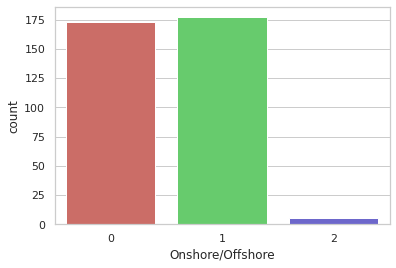

In [ ]:
# визуализируем 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

y_data = pd.DataFrame(train_full['Onshore/Offshore'])

sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

Класс который представлен в меньшем количестве называется - **миноритарным**

Класс который представлен в большем количестве называется - **мажоритарным**

Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (**undersampling**), во втором – увеличивают количество примеров миноритарного (**oversampling**).

Для нашего случая undersampling не очень подходит, так как мы сильно снизим количество данных, что в свою очередь скажется сильно на качестве классификатора.

**Дублирование примеров миноритарного класса (Oversampling)**

Самый простой метод – это дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо, выбирается количество случайных записей для дублирования.

Такой подход к восстановлению баланса не всегда может оказаться самым эффективным, поэтому был предложен специальный метод увеличения числа примеров миноритарного класса – алгоритм ***SMOTE (Synthetic Minority Oversampling Technique)***.

**SMOTE** вводит синтетические примеры в сегментах линии для передискретизации миноритарных отсчетов класса. Она объединяет все классы k-миноритариев, которые находятся близко к соседям. Выбор соседей k ближайших соседей случайен. Число зависит от количества передискретизации, необходимого модели.

Эта стратегия основана на идее генерации некоторого количества искусственных примеров, которые были бы «похожи» на имеющиеся в миноритарном классе, но при этом не дублировали их.

Подробнее в документации:

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
from imblearn.over_sampling import SMOTE

# создадим модель SMOTE указав кол-во соседей 3 (больше нет смысла, у нас всего 5 экземпляров одного класса)
os = SMOTE(random_state=0, k_neighbors=3)

# вектор признаков
X_train_full = train_full.drop(['Onshore/Offshore'], axis=1) 
# вектор целевой переменной
y_train_full = train_full['Onshore/Offshore']

column = X_train_full.columns

print("До балансировки")
print(X_train_full.shape)
print(y_train_full.value_counts())

# Применим алгоритм балансировки
os_data_X, os_data_y = os.fit_sample(X_train_full, y_train_full)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Onshore/Offshore'])

print('_'*100)
print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки
(355, 86)
1    177
0    173
2      5
Name: Onshore/Offshore, dtype: int64
____________________________________________________________________________________________________
После балансировки
(531, 86)
Onshore/Offshore
2                   177
1                   177
0                   177
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
os_data_X.head()

,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT,Structural setting_BACKARC,Structural setting_DELTA,Structural setting_FOREARC,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH,Hydrocarbon type_CARBON DIOXIDE,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_METHANE HYDRATE,Hydrocarbon type_OIL,Reservoir status_ABANDONED,...,Reservoir status_PLATEAU PRODUCTION,Reservoir status_REJUVENATING,Reservoir status_SECOND PLATEAU PRODUTION,Reservoir status_UNDEVELOPED,Reservoir status_UNKNOWN,Period_ARCHEAN,Period_CAMBRIAN,Period_CAMBRIAN-ORDOVICIAN,Period_CARBONIFEROUS,Period_CARBONIFEROUS-CRETACEOUS,Period_CARBONIFEROUS-PERMIAN,Period_CRETACEOUS,Period_CRETACEOUS-PALEOGENE,Period_DEVONIAN,Period_JURASSIC,Period_JURASSIC-CRETACEOUS,Period_NEOGENE,Period_ORDOVICIAN,Period_PALEOGENE,Period_PALEOGENE-NEOGENE,Period_PALEOZOIC,Period_PERMIAN,Period_PROTEROZOIC,Period_PROTEROZOIC-CAMBRIAN,Period_TRIASSIC,Period_TRIASSIC-JURASSIC,Lithology_BASEMENT,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CHERT,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,15250.000000,8000.000000,575.000000,5.000000,0.100000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16360.000000,980.000000,490.000000,16.000000,10.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4700.000000,65.000000,21.000000,8.000000,0.500000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8105.345849,116.037254,41.595776,14.984042,29.920211,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7600.000000,158.000000,15.000000,9.500000,10.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Построение модели

В качестве модели я выбрала метод опорных векторов, в том числе потому что он хорошо работает на разряженных данных.

Но в качестве продвинутого решения, модель должна выбираться из нескольких путем экспериментов.

In [ ]:
# os_data_X_ - это вектор признаков (все сбалансировано и обработано)
# os_data_y - вектор ответов

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=1)

SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SCV_predict = SVC_model.predict(X_test)

print(confusion_matrix(y_test, SCV_predict))
print(accuracy_score(y_test, SCV_predict))

[[42  0  6]
 [27  7 19]
 [ 8  6 45]]
0.5875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**У нас получились не очень хорошие оценки для классификатора.**

В продвинутом варианте мы посмотрим как улучшить модель используя:
- кроссвалидацию
- масштабирование признаков
- подбор гиперпараметров модели: RandomSearchCV, GridSearchCV